In [1]:
import physicl as phys
import physicl.light as light
import physicl.newton as newton
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_0 = phys.Measurement(2.5e25, "m**-3")
r_0 = phys.Measurement(8.6e3, "m")
R_E = phys.Measurement(6371e3, "m**1")
z_0 = phys.Measurement(8.6e3, "m**1")


cl_n = "{} * exp(-1 * ({} - {})/({}))".format(n_0, "sqrt(pow(r0[gid], 2) + pow(r1[gid], 2) + pow(r2[gid], 2))", R_E, r_0)
cl_n2 = "{} * exp(r2[gid] / {})".format(n_0, z_0)

def n(x, y, z):
    return n_0 * np.exp(-(np.sqrt(sum(np.square([x, y, z]))) - R_E)/r_0)

def n2(x, y, z):
    return n_0 * np.exp(z / z_0) * (x/x) * (y/y)

fig = plt.figure()
ax = fig.gca(projection='3d')
x, y = np.meshgrid(np.arange(-1e6, 1e6, 0.01e7), np.arange(-1e7, 1e6, 0.01e7))
z = n2(x, 8e6, y)
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.title("Number Density vs. Position ($z = 8.0 \cdot 10^6$ m)")

ax.plot_wireframe(x, y, z)
plt.show()

c:\users\bcwarner\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


<Figure size 640x480 with 1 Axes>

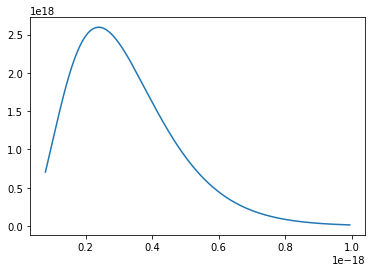

In [2]:
T = 5778
Eg = np.linspace(phys.light.E_from_wavelength(200e-9), phys.light.E_from_wavelength(2500e-9), 1000)
gamma = phys.light.planck_distribution(Eg, T)

E = [phys.light.planck_phot_distribution(phys.light.E_from_wavelength(200e-9), phys.light.E_from_wavelength(2500e-9), T, bins=50000) for x in range(10000)]
phot = phys.light.generate_photons_from_E(E)
for p in phot:
    p.r = phys.Measurement([-150e3, np.random.uniform(-50e3, 50e3), np.random.uniform(0, 100e3)], "m**1")
plt.plot(Eg, gamma)
plt.show()

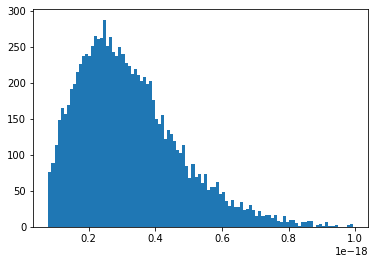

In [3]:
plt.hist(E, 100)
plt.show()

In [4]:
runtime = ((50 * 3 + 50) * 1e3 / phys.light.c) * 5
print("Target runtime: " + str(runtime))
A_targ = phys.Measurement(5.1e-31, "m**2") * (phys.Measurement(532e-9, "m**1") ** 4)
sim = phys.Simulation(cl_on=True, exit=lambda cond: cond.t >= runtime)

sim.add_step(2, phys.UpdateTimeStep(lambda t: phys.Measurement(0.00001, "s**1")))
sim.add_step(1, newton.NewtonianKinematicsStep())
sim.add_step(3, light.ScatterIsotropicStep(A=A_targ, variable_n = True, variable_n_fn = cl_n2, wavelength_dep_scattering=True))

tp = phys.light.TracePathMeasureStep(None)
sim.add_step(0, tp)
sim.add_objs(phot)

Target runtime: 0.0033356409519815205


In [5]:
import time
sim.start()

while sim.running:
    time.sleep(1)
    print(sim.get_state())

{'objects': 10000, 't': 1e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 1.017040491104126}
{'objects': 10000, 't': 1e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 2.0276384353637695}
{'objects': 10000, 't': 2e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 3.056678056716919}
{'objects': 10000, 't': 2e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 4.068568706512451}
{'objects': 10000, 't': 3.0000000000000004e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 5.092022895812988}
{'objects': 10000, 't': 4e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 6.104112863540649}
{'objects': 10000, 't': 4e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 7.116132736206055}
{'objects': 10000, 't': 5e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 8.128181457519531}
{'objects': 10000, 't': 5e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 9.175053119659424}
{'objects': 10000, 't': 6e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 10.193373441696167}
{'objects': 10000, 't': 7.000000000000001e-05 s**1, 'dt': 1e-05 s**1, 'run_time': 11.205766677856445}
{'objects': 10000, 't': 7.000

{'objects': 10000, 't': 0.0005500000000000008 s**1, 'dt': 1e-05 s**1, 'run_time': 89.5140905380249}
{'objects': 10000, 't': 0.0005600000000000008 s**1, 'dt': 1e-05 s**1, 'run_time': 90.53806781768799}
{'objects': 10000, 't': 0.0005600000000000008 s**1, 'dt': 1e-05 s**1, 'run_time': 91.56902766227722}
{'objects': 10000, 't': 0.0005700000000000008 s**1, 'dt': 1e-05 s**1, 'run_time': 92.62119436264038}
{'objects': 10000, 't': 0.0005800000000000009 s**1, 'dt': 1e-05 s**1, 'run_time': 93.65636658668518}
{'objects': 10000, 't': 0.0005800000000000009 s**1, 'dt': 1e-05 s**1, 'run_time': 94.66902947425842}
{'objects': 10000, 't': 0.0005900000000000009 s**1, 'dt': 1e-05 s**1, 'run_time': 95.7054135799408}
{'objects': 10000, 't': 0.0005900000000000009 s**1, 'dt': 1e-05 s**1, 'run_time': 96.74338006973267}
{'objects': 10000, 't': 0.0006000000000000009 s**1, 'dt': 1e-05 s**1, 'run_time': 97.7494101524353}
{'objects': 10000, 't': 0.000610000000000001 s**1, 'dt': 1e-05 s**1, 'run_time': 98.7801611423

{'objects': 10000, 't': 0.0010600000000000021 s**1, 'dt': 1e-05 s**1, 'run_time': 172.5974040031433}
{'objects': 10000, 't': 0.0010700000000000022 s**1, 'dt': 1e-05 s**1, 'run_time': 173.6225938796997}
{'objects': 10000, 't': 0.0010800000000000022 s**1, 'dt': 1e-05 s**1, 'run_time': 174.63530373573303}
{'objects': 10000, 't': 0.0010800000000000022 s**1, 'dt': 1e-05 s**1, 'run_time': 175.6651213169098}
{'objects': 10000, 't': 0.0010900000000000022 s**1, 'dt': 1e-05 s**1, 'run_time': 176.68353033065796}
{'objects': 10000, 't': 0.0011000000000000022 s**1, 'dt': 1e-05 s**1, 'run_time': 177.72029876708984}
{'objects': 10000, 't': 0.0011000000000000022 s**1, 'dt': 1e-05 s**1, 'run_time': 178.73856210708618}
{'objects': 10000, 't': 0.0011100000000000023 s**1, 'dt': 1e-05 s**1, 'run_time': 179.79826259613037}
{'objects': 10000, 't': 0.0011200000000000023 s**1, 'dt': 1e-05 s**1, 'run_time': 180.81018257141113}
{'objects': 10000, 't': 0.0011200000000000023 s**1, 'dt': 1e-05 s**1, 'run_time': 181

{'objects': 10000, 't': 0.0015800000000000035 s**1, 'dt': 1e-05 s**1, 'run_time': 255.83914351463318}
{'objects': 10000, 't': 0.0015900000000000035 s**1, 'dt': 1e-05 s**1, 'run_time': 256.8692789077759}
{'objects': 10000, 't': 0.0015900000000000035 s**1, 'dt': 1e-05 s**1, 'run_time': 257.88130497932434}
{'objects': 10000, 't': 0.0016000000000000035 s**1, 'dt': 1e-05 s**1, 'run_time': 258.94213485717773}
{'objects': 10000, 't': 0.0016000000000000035 s**1, 'dt': 1e-05 s**1, 'run_time': 260.57433581352234}
{'objects': 10000, 't': 0.0016100000000000036 s**1, 'dt': 1e-05 s**1, 'run_time': 261.5962829589844}
{'objects': 10000, 't': 0.0016200000000000036 s**1, 'dt': 1e-05 s**1, 'run_time': 262.62625885009766}
{'objects': 10000, 't': 0.0016200000000000036 s**1, 'dt': 1e-05 s**1, 'run_time': 263.6874837875366}
{'objects': 10000, 't': 0.0016300000000000036 s**1, 'dt': 1e-05 s**1, 'run_time': 264.6952586174011}
{'objects': 10000, 't': 0.0016400000000000037 s**1, 'dt': 1e-05 s**1, 'run_time': 265.

{'objects': 10000, 't': 0.0021000000000000046 s**1, 'dt': 1e-05 s**1, 'run_time': 340.26450181007385}
{'objects': 10000, 't': 0.0021000000000000046 s**1, 'dt': 1e-05 s**1, 'run_time': 341.27746295928955}
{'objects': 10000, 't': 0.0021100000000000047 s**1, 'dt': 1e-05 s**1, 'run_time': 342.29025959968567}
{'objects': 10000, 't': 0.0021200000000000047 s**1, 'dt': 1e-05 s**1, 'run_time': 343.30311131477356}
{'objects': 10000, 't': 0.0021200000000000047 s**1, 'dt': 1e-05 s**1, 'run_time': 344.315869808197}
{'objects': 10000, 't': 0.0021300000000000047 s**1, 'dt': 1e-05 s**1, 'run_time': 345.3272919654846}
{'objects': 10000, 't': 0.0021400000000000047 s**1, 'dt': 1e-05 s**1, 'run_time': 346.3582646846771}
{'objects': 10000, 't': 0.0021400000000000047 s**1, 'dt': 1e-05 s**1, 'run_time': 347.3701367378235}
{'objects': 10000, 't': 0.0021500000000000048 s**1, 'dt': 1e-05 s**1, 'run_time': 348.3884217739105}
{'objects': 10000, 't': 0.0021500000000000048 s**1, 'dt': 1e-05 s**1, 'run_time': 349.42

{'objects': 10000, 't': 0.002600000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 425.42766547203064}
{'objects': 10000, 't': 0.002610000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 426.44050335884094}
{'objects': 10000, 't': 0.002610000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 427.45331287384033}
{'objects': 10000, 't': 0.002620000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 428.50030994415283}
{'objects': 10000, 't': 0.002630000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 429.51226925849915}
{'objects': 10000, 't': 0.002630000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 430.5370831489563}
{'objects': 10000, 't': 0.002640000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 431.5831391811371}
{'objects': 10000, 't': 0.002640000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 432.7024235725403}
{'objects': 10000, 't': 0.002650000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 433.7091612815857}
{'objects': 10000, 't': 0.002660000000000006 s**1, 'dt': 1e-05 s**1, 'run_time': 434.7693405151

{'objects': 10000, 't': 0.0031200000000000073 s**1, 'dt': 1e-05 s**1, 'run_time': 510.7015790939331}
{'objects': 10000, 't': 0.0031200000000000073 s**1, 'dt': 1e-05 s**1, 'run_time': 511.7503626346588}
{'objects': 10000, 't': 0.0031300000000000073 s**1, 'dt': 1e-05 s**1, 'run_time': 512.7691230773926}
{'objects': 10000, 't': 0.0031400000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 513.8283655643463}
{'objects': 10000, 't': 0.0031400000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 514.8582565784454}
{'objects': 10000, 't': 0.0031500000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 515.8763234615326}
{'objects': 10000, 't': 0.0031500000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 516.8884365558624}
{'objects': 10000, 't': 0.0031600000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 517.9011552333832}
{'objects': 10000, 't': 0.0031700000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 518.9131481647491}
{'objects': 10000, 't': 0.0031700000000000074 s**1, 'dt': 1e-05 s**1, 'run_time': 519.92531

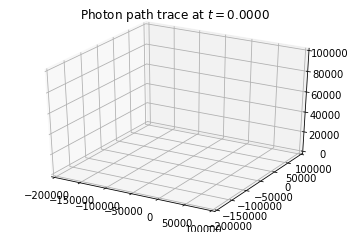

In [8]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def update(frame):
    plt.cla()
    plt.xlim(-2e5, 1e5)
    plt.ylim(-2e5, 1e5)
    plt.title("Photon path trace at $t = {:.4f}$".format(tp.data[0][frame + 1]))
    ax.set_zlim(0, 100e3)
    for i in range(99):
        xs = [x[0] for x in tp.data[1 + i][1:(frame + 1)]]
        ys = [x[1] for x in tp.data[1 + i][1:(frame + 1)]]
        zs = [x[2] for x in tp.data[1 + i][1:(frame + 1)]]
        ax.plot(xs, ys, zs, label="Path of Photon " + str(i))
        ax.scatter(xs, ys, zs)
        
ani = FuncAnimation(fig, update, len(tp.data[2]) - 1)
ani.save("trace_path.mp4", "ffmpeg", fps=30, dpi=144)

plt.show()